In [1]:
#Aktifkan Package
import pandas as pd
import numpy as np

In [1]:
from flask import Flask, render_template, request, redirect, url_for, abort
import requests

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Input Data
dataset = pd.read_csv('datacoba.csv', encoding= 'unicode_escape')
dataset.head()

,Kecamatan,Daerah,kamar_tidur,luas_bangunan,luas_lahan,harga
0,Sleman,Berbah,4,51 m?,125 m?,700000000
1,Sleman,Purwo martani,3,100 m?,135 m?,1200000000
2,Sleman,Purwo martani,5,162 m?,126 m?,1795000000
3,Bantul,Kasihan,2,45 m?,80 m?,329000000
4,Kulon Progo,Wates,2,36 m?,110 m?,370000000


In [3]:
#Label encoder
from sklearn import preprocessing
category_col =['Daerah', 'Kecamatan', 'kamar_tidur','luas_bangunan', 'luas_lahan']
labelEncoder = preprocessing.LabelEncoder()

In [4]:
#Daftar Kategorik
mapping_dict={}
for col in category_col:
 dataset[col] = labelEncoder.fit_transform(dataset[col])
 le_name_mapping = dict(zip(labelEncoder.classes_,
labelEncoder.transform(labelEncoder.classes_)))
 mapping_dict[col]=le_name_mapping
print(mapping_dict)

{'Daerah': {'Banguntapan': 0, 'Bantul': 1, 'Berbah': 2, 'Cangkringan': 3, 'Caturtunggal': 4, 'Condong Catur': 5, 'Depok': 6, 'Gamping': 7, 'Godean': 8, 'Imogiri': 9, 'Jetis': 10, 'Kalasan': 11, 'Kasihan': 12, 'Kotagede': 13, 'Maguwoharjo': 14, 'Mantrijeron': 15, 'Mergangsan': 16, 'Mlati': 17, 'Moyudan': 18, 'Ngaglik': 19, 'Ngemplak': 20, 'Pajangan': 21, 'Pakem': 22, 'Pakualaman': 23, 'Pandak': 24, 'Pengasih': 25, 'Piyungan': 26, 'Playen': 27, 'Pleret': 28, 'Prambanan': 29, 'Purwo martani': 30, 'Sedayu': 31, 'Sewon': 32, 'Seyegan': 33, 'Sleman': 34, 'Srandakan': 35, 'Tegalrejo': 36, 'Temon': 37, 'Tempel': 38, 'Turi': 39, 'Umbulharjo': 40, 'Wates': 41, 'Wirobrajan': 42, 'Wonosari': 43}, 'Kecamatan': {' Bantul': 0, ' Gunung Kidul': 1, ' Kulon Progo': 2, ' Sleman': 3, ' Yogyakarta': 4}, 'kamar_tidur': {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 14: 12, 15: 13, 16: 14, 18: 15, 19: 16, 20: 17, 24: 18, 32: 19, 35: 20}, 'luas_bangunan': {'100 m?': 0, '103 m?':

In [5]:
#Variabel Independen
X = dataset.drop(["harga"], axis=1)
X.head()

,Kecamatan,Daerah,kamar_tidur,luas_bangunan,luas_lahan
0,3,2,3,97,35
1,3,30,2,0,44
2,3,30,4,25,36
3,0,12,1,86,185
4,2,41,1,71,15


In [6]:
#Variabel Dependen
y=dataset["harga"]
y.head()

0     700000000
1    1200000000
2    1795000000
3     329000000
4     370000000
Name: harga, dtype: int64

In [7]:
#DataTesting dan Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1234)

In [22]:
#Proporsi Data Testing dan Training
print(X_train.values.reshape(-1, 1))
print(X_test.values.reshape(-1, 1))

[[  3]
 [  6]
 [  1]
 ...
 [ 11]
 [ 45]
 [132]]
[[  3]
 [ 38]
 [ 10]
 [ 78]
 [  0]
 [  4]
 [ 40]
 [  4]
 [ 31]
 [147]
 [  4]
 [ 36]
 [  4]
 [ 43]
 [ 87]
 [  3]
 [  6]
 [  7]
 [109]
 [157]
 [  0]
 [ 31]
 [  1]
 [  9]
 [185]
 [  4]
 [ 15]
 [  3]
 [ 79]
 [ 33]
 [  3]
 [ 11]
 [  2]
 [  3]
 [ 41]
 [  0]
 [ 12]
 [  3]
 [ 78]
 [187]
 [  3]
 [ 19]
 [  3]
 [ 81]
 [164]
 [  3]
 [ 19]
 [  2]
 [ 61]
 [156]
 [  3]
 [ 17]
 [  2]
 [ 12]
 [ 15]
 [  3]
 [ 19]
 [  1]
 [  4]
 [ 61]
 [  0]
 [  0]
 [  6]
 [107]
 [  2]
 [  3]
 [ 29]
 [  2]
 [124]
 [ 63]
 [  3]
 [ 17]
 [  1]
 [114]
 [ 10]
 [  3]
 [ 17]
 [  1]
 [  4]
 [ 64]
 [  3]
 [ 19]
 [  2]
 [129]
 [ 11]
 [  3]
 [ 34]
 [  2]
 [107]
 [ 28]
 [  3]
 [ 19]
 [  2]
 [ 86]
 [ 35]
 [  3]
 [  6]
 [  1]
 [129]
 [ 15]
 [  4]
 [ 36]
 [  2]
 [ 72]
 [126]
 [  3]
 [ 34]
 [  1]
 [114]
 [197]
 [  3]
 [ 14]
 [  2]
 [ 11]
 [ 41]
 [  3]
 [ 17]
 [  2]
 [ 65]
 [138]
 [  3]
 [ 22]
 [  2]
 [  0]
 [171]
 [  0]
 [  0]
 [  2]
 [104]
 [167]
 [  3]
 [ 19]
 [  2]
 [133]
 [ 28]
 [  3]


In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=7,random_state=1234)

In [10]:
regressor.fit(X_test, y_test)
y_pred=regressor.predict(X_test)

In [11]:
#Nilai Koefiisien Determinasi Data Testing
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

-0.0007861304127378954

In [12]:
#Nilai Koefiisien Determinasi Data Training
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

-0.0007861304127378954

In [13]:
#Perhitungan Akurasi
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE :', np.mean(np.abs((y_test - y_pred) / y_test))*100)
print ('Nilai akurasi :', (1-(np.mean(np.abs((y_test - y_pred) / y_test))))*100)

Mean Absolute Error: 349347554.6975547
Mean Squared Error: 4.3606362147867264e+17
Root Mean Squared Error: 660351134.9870405
MAPE : 35.98020518436748
Nilai akurasi : 64.01979481563251


In [14]:
import matplotlib.pyplot as plt

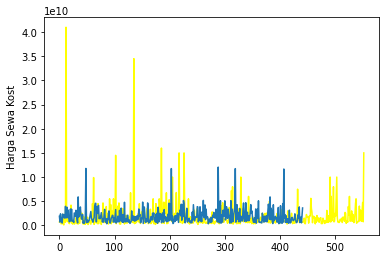

In [15]:
#Plot Perbandingan Nilai Aktual dan Prediksi
plt.plot(y, label="Data aktual",color="yellow")
plt.plot(y_pred2, label="Data prediksi")
plt.ylabel('Harga Sewa Kost')
plt.show()

In [19]:
A=y_test.values.reshape(-1,1)

In [20]:
B=y_pred.reshape(-1,1)

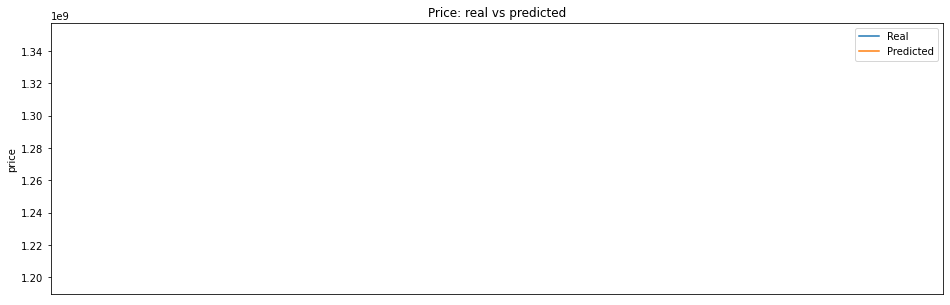

In [21]:
plt.rcParams['figure.figsize']=16,5
plt.figure()
plt.plot(A[-100], label="Real")
plt.plot(B[-100], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

         feature  importance
0      Kecamatan    0.097994
1         Daerah    0.180210
2    kamar_tidur    0.054563
3  luas_bangunan    0.514650
4     luas_lahan    0.152583


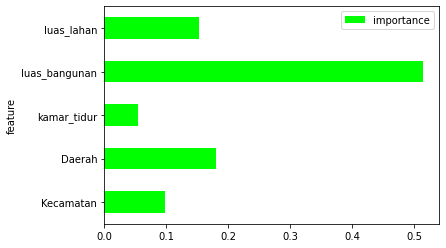

In [16]:
#Feature Importance
# Feature importances into a dataframe
features = list(X_train.columns)
feature_importances = pd.DataFrame({'feature': features,'importance': regressor.feature_importances_})
feature_importances .plot(x ='feature', y='importance', kind ='barh', color="lime")
print(feature_importances)

In [17]:
#Save Model
import pickle
pickle.dump(regressor, open('model.sav','wb'))
model = pickle.load(open('model.sav','rb'))
print(model.predict([[3,2,3,97,35]]))

[9.28571429e+08]


In [24]:
estimator=regressor.feature_importances_[100]

IndexError: index 100 is out of bounds for axis 0 with size 5

In [39]:
import pandas as pd

# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': regressor.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
3,luas_bangunan,0.514650
1,Daerah,0.180210
4,luas_lahan,0.152583
0,Kecamatan,0.097994
2,kamar_tidur,0.054563


In [ ]:
#display in tree
from IPython.display import Image
Image(filename='tree.png')